In [1]:
import pandas as pd
import sklearn as sk
from sklearn import svm
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# Read CSV

In [91]:
df = pd.read_csv('Problem2_Data.csv')

In [92]:
df

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34276,1297376,1,0,10.0,0,0,9,14,24,0,...,0,0.89,0.90,0,0,0,1,17.050805,0,1
34277,2131919,88,2,4.0,0,0,0,0,0,5,...,0,0.22,0.14,1,0,0,1,17.004158,0,1
34278,1466851,1,4,8.0,0,0,0,0,10,2,...,0,0.99,0.99,0,0,0,1,17.068666,0,1
34279,1554343,5,0,2.0,0,0,0,0,144,0,...,0,0.85,0.74,0,0,0,1,17.054827,0,1


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
ID        34281 non-null int64
IV        34281 non-null int64
A1        34281 non-null int64
A2        32538 non-null float64
A3        34281 non-null int64
A4        34281 non-null int64
A5        34281 non-null int64
A6        34281 non-null int64
A7        34281 non-null int64
A8        34281 non-null int64
A9        34281 non-null int64
A10       34281 non-null int64
A11       34281 non-null int64
A12       34281 non-null int64
A13       34281 non-null int64
A14       34281 non-null int64
A15       34281 non-null float64
A16       34281 non-null float64
A17       34281 non-null int64
A18       34281 non-null int64
A19       34281 non-null int64
A20       34281 non-null int64
A21       34281 non-null float64
A22       34281 non-null int64
Target    34281 non-null int64
dtypes: float64(4), int64(21)
memory usage: 6.5 MB


In [94]:
df['A2'].mean()

7.355184707111685

In [95]:
df['A2'].fillna(7.355184707111685,inplace=True)

In [96]:
df[df['A15'] != -99]['A15'].mean()

0.7549572516225272

In [97]:
df['A15'].replace(-99,0.7549572516225272,inplace=True)

In [98]:
df[df['A16'] != -99]['A16'].mean()

0.7504633600596594

In [99]:
df['A16'].replace(-99,0.7504633600596594,inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
ID        34281 non-null int64
IV        34281 non-null int64
A1        34281 non-null int64
A2        34281 non-null float64
A3        34281 non-null int64
A4        34281 non-null int64
A5        34281 non-null int64
A6        34281 non-null int64
A7        34281 non-null int64
A8        34281 non-null int64
A9        34281 non-null int64
A10       34281 non-null int64
A11       34281 non-null int64
A12       34281 non-null int64
A13       34281 non-null int64
A14       34281 non-null int64
A15       34281 non-null float64
A16       34281 non-null float64
A17       34281 non-null int64
A18       34281 non-null int64
A19       34281 non-null int64
A20       34281 non-null int64
A21       34281 non-null float64
A22       34281 non-null int64
Target    34281 non-null int64
dtypes: float64(4), int64(21)
memory usage: 6.5 MB


In [101]:
df.dropna(inplace=True)

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = df[~(df < 0)]
df.dropna(inplace=True)
array = df.values
X = array[:,1:24]
Y = array[:,24]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[2.915e+06 9.278e+04 2.634e+03 2.365e+05 6.657e+03 1.071e+04 1.453e+05
 3.193e+05 4.976e+04 5.045e+05 9.140e+05 0.000e+00 1.209e+06 5.942e+01
 2.293e+04 4.438e+01 4.203e+01 8.934e+01 8.819e+00 6.812e+01 2.146e-02
 4.959e-05 3.179e+00]
[[2.049e+03 1.230e+02 2.300e+02 3.300e+02]
 [4.800e+01 1.000e+00 1.000e+00 1.000e+00]
 [3.180e+02 1.000e+00 2.000e+00 2.000e+00]
 [6.200e+01 2.400e+01 4.200e+01 7.100e+01]
 [2.000e+00 0.000e+00 2.000e+00 2.000e+00]]


In [103]:
df_new = pd.DataFrame({'IV':list(df['IV']),'A9':list(df['A9']),
'A10':list(df['A10']),'A12':list(df['A12']),'Target':list(df['Target'])})

In [104]:
df_new.head()

,IV,A9,A10,A12,Target
0,2049.0,123,230,330,0
1,48.0,1,1,1,0
2,318.0,1,2,2,0
3,62.0,24,42,71,0
4,2.0,0,2,2,0


In [118]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33310 entries, 0 to 33309
Data columns (total 5 columns):
IV        33310 non-null float64
A9        33310 non-null float64
A10       33310 non-null float64
A12       33310 non-null float64
Target    33310 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.3 MB


In [111]:
df_new.describe()

,IV,A9,A10,A12,Target
count,33310.000000,33310.000000,33310.000000,33310.000000,33310.000000
mean,244.590513,128.824437,229.920174,331.861153,0.312309
std,3374.175071,4208.590754,4585.344015,5063.785523,0.463442
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,3.000000,5.000000,7.000000,0.000000
75%,43.000000,18.000000,34.000000,49.750000,1.000000
max,366924.000000,742110.000000,742750.000000,743215.000000,1.000000


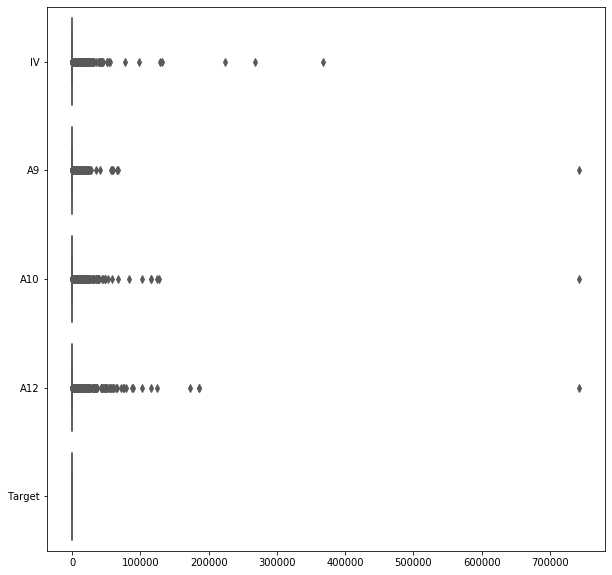

In [112]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_new,orient="h", palette="Set2")

In [113]:
def remove_outlier_by_mean_value(df , col_in):
    q1 = df[col_in].quantile(0.25)
    q3 = df[col_in].quantile(0.75)
    value = df[col_in].mean()
    iqr = q3-q1
    x = list(df[col_in])
    y = []
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    for i in x:
        if (i < fence_low) or (i > fence_high):
            i = value
            y.append(i)
        else:
            y.append(i)
    df.drop(col_in,axis=1,inplace=True)
    df[col_in] = y

In [114]:
for i in df_new.columns:
    remove_outlier_by_mean_value(df_new,i)

In [1]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_new,orient="h", palette="Set2")

NameError: name 'plt' is not defined

/home/shanur/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/shanur/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


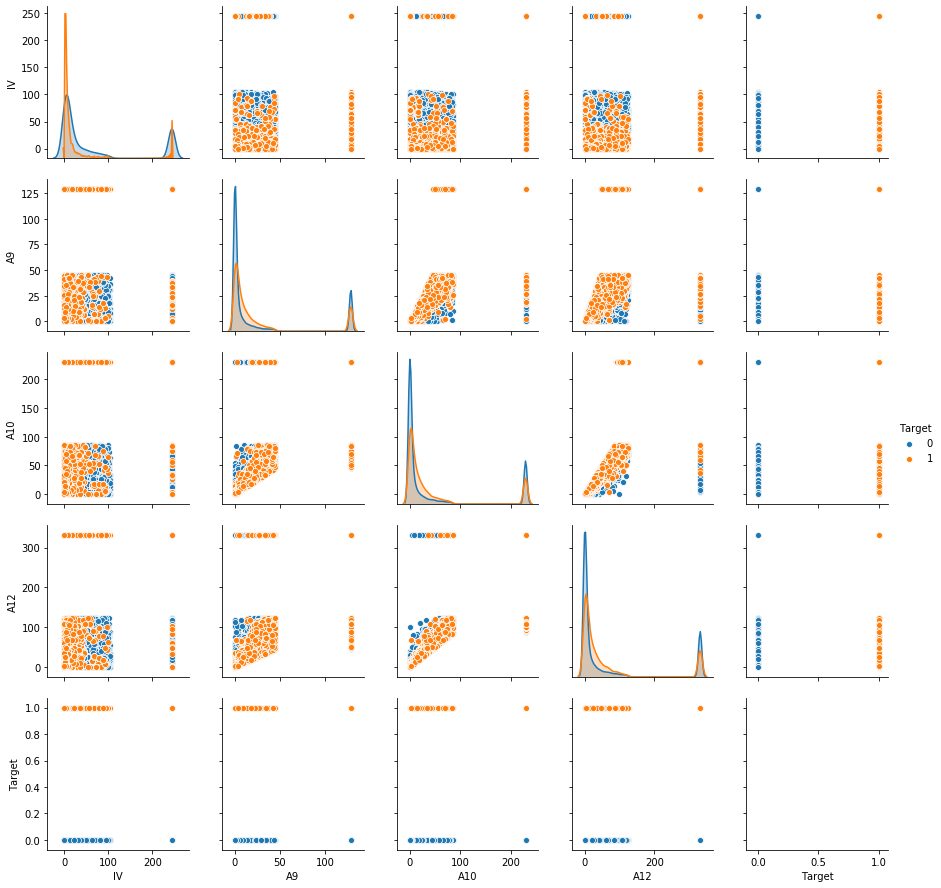

In [117]:
sns.pairplot(df_new,hue='Target')

In [119]:
from sklearn.preprocessing import Normalizer

In [121]:
scaler = Normalizer().fit(df.drop('Target',axis=1))
standarized_x = scaler.transform(df.drop('Target',axis=1))
standarized_x_test = scaler.transform(df.drop('Target',axis=1))

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X = standarized_x
y = df_final.Target

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [126]:
model = RandomForestClassifier(n_estimators=100)

In [127]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
y_pred = model.predict(X_test)

In [129]:
print(accuracy_score(y_test,y_pred))

0.8964274992494746


In [130]:
print(confusion_matrix(y_test,y_pred))

[[4242  335]
 [ 355 1730]]


In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4577
           1       0.84      0.83      0.83      2085

    accuracy                           0.90      6662
   macro avg       0.88      0.88      0.88      6662
weighted avg       0.90      0.90      0.90      6662

